In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import spacy
from operator import itemgetter
import numpy as np
from matplotlib_venn import venn2, venn3
from Intro_to_Relavance_Labelling import load_data, get_data
from Deciding_Relevance import calculate_score, deciding_relevance
import io

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random
import seaborn as sns

nlp = spacy.load('en_core_web_sm')

Argota: 207 , Cata : 501, Manuel : 521, Marta : 615, Shivangi : 505, Uxue : 416
ALL RELEVANT:  130
ALL nonRELEVANT:  22


In [2]:
argota, Na = load_data('FashionData/fashion_cleaned-tagged_argota.json',) 
cata, Nc = load_data('FashionData/fashion_cleaned-tagged_cata.json',) 
manuel, Nm = load_data('FashionData/fashion_cleaned-tagged_manuel.json',) 
marta, Nmt = load_data('FashionData/fashion_cleaned-tagged_marta.json',) 
shivangi, Ns = load_data('FashionData/fashion_cleaned-tagged_shivangi.json',) 
uxue, Nu = load_data('FashionData/fashion_cleaned-tagged_uxue.json',) 

print('Argota: {} , Cata : {}, Manuel : {}, Marta : {}, Shivangi : {}, Uxue : {}'.format(Na, Nc, Nm, Nmt, Ns, Nu))
#Not using Argota Labellings

relevant_argota , nonrelevant_argota = get_data(argota)
relevant_cata , nonrelevant_cata = get_data(cata)
relevant_manuel, nonrelevant_manuel = get_data(manuel)
relevant_marta , nonrelevant_marta = get_data(marta)
relevant_shivangi , nonrelevant_shivangi = get_data(shivangi)
relevant_uxue , nonrelevant_uxue = get_data(uxue)

all_labels = [relevant_cata , nonrelevant_cata, relevant_manuel, nonrelevant_manuel, relevant_marta , nonrelevant_marta, relevant_shivangi , nonrelevant_shivangi, relevant_uxue , nonrelevant_uxue]
decision_relevant, decision_nonrelevant = deciding_relevance(3, all_labels, marta)

Argota: 207 , Cata : 501, Manuel : 521, Marta : 615, Shivangi : 505, Uxue : 416
Relevant : 369, NonRelevant : 117


In [81]:
with io.open('glove.6B.100d.txt', 'r', encoding='utf8') as f:
    glove_file = f.read()
    
glove_sentences = glove_file.splitlines()
glove_vocab = {}
for sentence in glove_sentences:
    word = sentence.split()[0]
    embedding = np.array(sentence.split()[1:], dtype = float)
    glove_vocab[word] = embedding

In [82]:
relevant_vectors = []
for word in decision_relevant:
    if word in glove_vocab:
        relevant_vectors.append(glove_vocab[word])
        
nonrelevant_vectors = []
for word in decision_nonrelevant:
    if word in glove_vocab:
        nonrelevant_vectors.append(glove_vocab[word])
        
print('Relevant : {}, NonRelevant : {}'.format(len(relevant_vectors), len(nonrelevant_vectors)))

Relevant : 357, NonRelevant : 107


In [83]:
def distance(v1, v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [84]:
def inclass_distance(vectors):
    in_classdistance = 0
    counter = 0

    for i, word in enumerate(vectors):
        if i < len(vectors) - 1:
            for nextword in vectors[i+1:]:
                in_classdistance += distance(word, nextword)
                counter += 1
    
    return in_classdistance/counter

In [85]:
def between_class_distance(vector1, vector2):
    btw_classdistance = 0
    counter = 0

    for word in vector1:
        for nextword in vector2:
            btw_classdistance += distance(word, nextword)
            counter += 1
    
    return btw_classdistance/counter

In [35]:
inclass_distance(relevant_vectors), inclass_distance(nonrelevant_vectors)

(6.723569875288294, 6.814214537700565)

In [36]:
between_class_distance(relevant_vectors, nonrelevant_vectors)

6.815123890677137

In [37]:
'''The between class distances and the inclass distances are almost the same and there.
There is hardly any way to differentiate between the two set of words.'''

'The between class distances and the inclass distances are almost the same and there.\nThere is hardly any way to differentiate between the two set of words.'

# PROVIDING CONTEXT : FINDING DISTANCE FROM WORD fashion

In [86]:
contexts = ['fashion', 'design', 'designer', 'designing', 'art']

r_fashion = []

for word in relevant_vectors:
    dist = 0
    for context in contexts:
        dist +=  distance(word, glove_vocab[context])
        
    dist /= len(contexts)
    r_fashion.append(dist)
    
print('Relevant:', sum(r_fashion)/len(r_fashion))

nr_fashion = []

for word in nonrelevant_vectors:
    dist = 0
    for context in contexts:
        dist +=  distance(word, glove_vocab[context])
        
    dist /= len(contexts)
    nr_fashion.append(dist)
    counter += 1
    
print('NonRelevant: ', sum(nr_fashion)/len(nr_fashion))

Relevant: 6.949044301172386
NonRelevant:  7.035572912946591


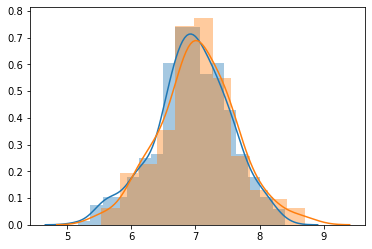

In [87]:
sns.distplot(r_fashion)
sns.distplot(nr_fashion)

In [56]:
'artist' in glove_vocab

True

In [ ]:
context = ['fashion', 'design', 'designer', 'art']